### 문제정의
- 보스턴 주택 가격데이터를 사용하여 주택 가격을 예측한다.
- 회귀모델 적용
- LinearRegression, SGDRegressor

### 데이터 수집

In [2]:
# warning 문구 제거
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

In [4]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [22]:
X['CHAS'] = X['CHAS'].astype('int64')
X['RAD']=X['RAD'].astype('int64')

### 데이터 합치기

In [23]:
import pandas as pd
total = pd.concat([X,y],axis = 1)
total

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


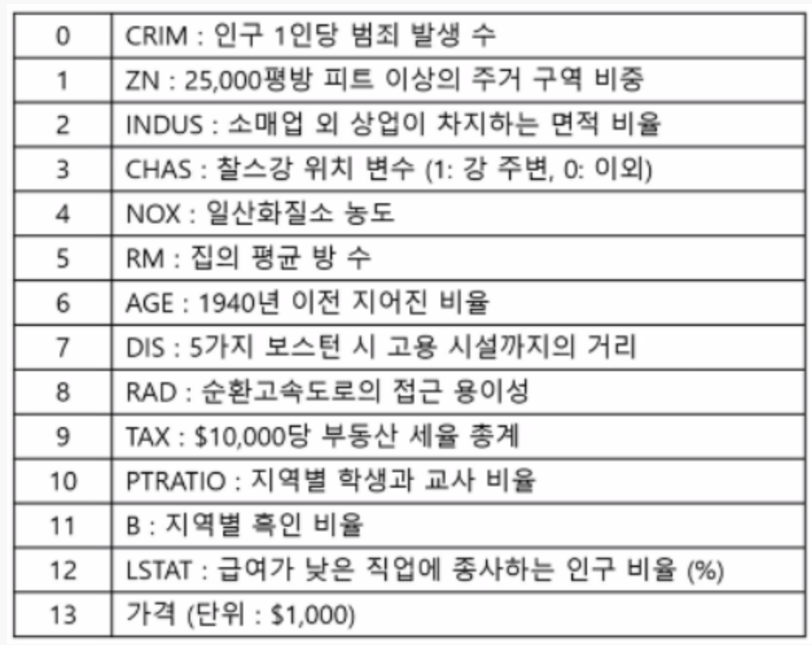

### 데이터 전처리
- 결측치, 이상치 확인단계
- 데이터 전처리 생략

### 탐색적 데이터 분석

### 상관관계 분석
- 피어슨 상관계수 : 두 컬럼의 선형도 판단

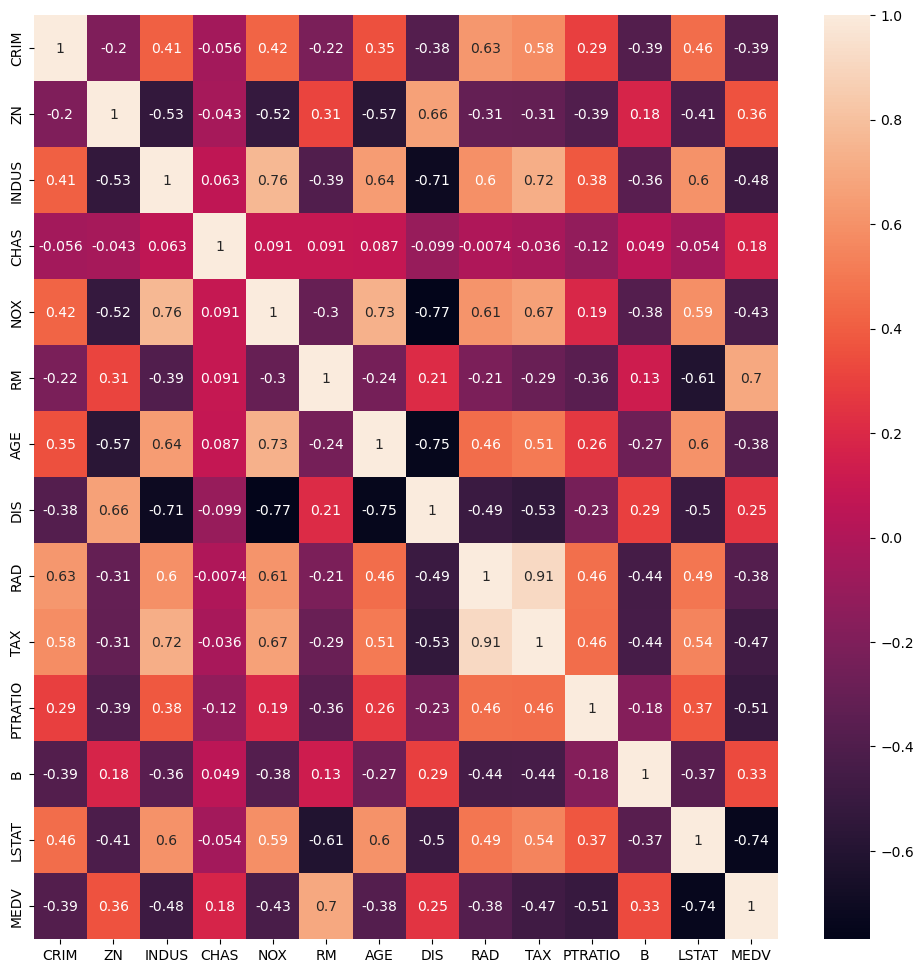

In [24]:
# 관계를 시각적으로 확인하기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(total.select_dtypes(include=['int64', 'float64']).corr(), annot=True)
plt.show()

# heatmap() : 시각적으로 뚜렷한 차이를 확인 --> 데이터를 전처리 할 때 우선순위를 판단하는 근거
# (활용)모델을 학습하는데 시간이 많이 걸린다.
# - 데이터를 줄여야 한다.(서비스를 제공할 때도 시간을 줄이자는 위미)
# - 가지고 있는 문제(특성)들 중에서 상관도가 낮은 것부터 삭제를 하고
# - 추가적으로 전처리를 해야하는데 시간이 부족하다 할때는 상관도가 높은것부터 차례로 전처리를 한다.

### 모델 선택 및 하이퍼파라미터 튜닝


In [9]:
# 수학적 공식을 이용한 해석적 모델
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# 경사하강법
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor()

### 훈련과 평가로 분리
- 학습 7 : 평가 3

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


### 학습

In [27]:
linear_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)

SGDRegressor()

### 예측

In [28]:
linear_model.score(X_train, y_train)

0.7495400632086622

In [29]:
linear_model.score(X_test, y_test)

0.6996255772983115

In [30]:
sgd_model.score(X_train, y_train)

-1.746993161371855e+26

In [31]:
sgd_model.score(X_test, y_test)

-1.311701239926371e+26